In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
cells = pd.read_csv('./Data/sample_info_20201216.csv', index_col=0)
cells.head(3)

,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,...,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,NIH:OVCAR-3,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,Female,ATCC,NaN,NaN,NaN,...,Metastasis,Ovarian Cancer,"Adenocarcinoma, high grade serous",60.0,SIDM00105,NaN,ovary,ovary_adenocarcinoma,high_grade_serous,NaN
ACH-000002,HL-60,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,Female,ATCC,NaN,NaN,NaN,...,Primary,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35.0,SIDM00829,NaN,blood,AML,M3,NaN
ACH-000003,CACO2,CACO2,CACO2_LARGE_INTESTINE,"CACO2, CaCo-2",NaN,Male,ATCC,NaN,NaN,NaN,...,NaN,Colon/Colorectal Cancer,Adenocarcinoma,NaN,SIDM00891,NaN,colorectal,colorectal_adenocarcinoma,NaN,NaN


In [3]:
bf = pd.read_csv('./Data/table_Avana2020Q4_CRISPRcleanR_corrected_all', sep='\t', index_col=0)
bf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18111 entries, A1BG to ZZZ3
Columns: 808 entries, ACH-001172 to ACH-002510
dtypes: float64(808)
memory usage: 111.8+ MB


In [4]:
cells = cells.loc[ bf.columns.values]
cells.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cell_line_name             792 non-null    object 
 1   stripped_cell_line_name    808 non-null    object 
 2   CCLE_Name                  808 non-null    object 
 3   alias                      36 non-null     object 
 4   COSMICID                   416 non-null    float64
 5   sex                        808 non-null    object 
 6   source                     808 non-null    object 
 7   Achilles_n_replicates      808 non-null    float64
 8   cell_line_NNMD             808 non-null    float64
 9   culture_type               643 non-null    object 
 10  culture_medium             808 non-null    object 
 11  cas9_activity              799 non-null    float64
 12  RRID                       750 non-null    object 
 13  WTSI_Master_Cell_ID        416 non-null

In [5]:
cells.to_csv('./Data/sample_info_808cells_20q4Avana.csv', index=True)

In [6]:
muts = pd.read_csv('./Data/CCLE_mutations.csv')
muts.info()

/home/traver/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (3,19,25,26,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239235 entries, 0 to 1239234
Data columns (total 34 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Hugo_Symbol             1239235 non-null  object 
 1   Entrez_Gene_Id          1239235 non-null  int64  
 2   NCBI_Build              1239235 non-null  int64  
 3   Chromosome              1239235 non-null  object 
 4   Start_position          1239235 non-null  int64  
 5   End_position            1239235 non-null  int64  
 6   Strand                  1239235 non-null  object 
 7   Variant_Classification  1238736 non-null  object 
 8   Variant_Type            1238738 non-null  object 
 9   Reference_Allele        1239235 non-null  object 
 10  Tumor_Seq_Allele1       1239235 non-null  object 
 11  dbSNP_RS                188012 non-null   object 
 12  dbSNP_Val_Status        34029 non-null    object 
 13  Genome_Change           1238636 non-null  object 
 14  An

In [7]:
#
# get LOF and GOF matrices
#

genes = bf.index.values
cells_list = cells.index.values

LOF = pd.DataFrame(index=genes, columns=cells.index.values)
GOF = pd.DataFrame(index=genes, columns=cells.index.values)


In [8]:
keep = [x for x in muts.index.values if muts.loc[x]['DepMap_ID'] in cells_list]
len(keep)

560200

In [9]:
muts = muts.loc[keep]

In [10]:
keep = [x for x in muts.index.values if muts.loc[x]['Hugo_Symbol'] in genes]
len(keep)

513694

In [11]:
muts = muts.loc[keep]

In [12]:
muts.to_csv('./Data/CCLE_mutations_808cells_18111genes_Avana20q4.csv')

In [13]:
#
# assign per-sample LOF and GOF calls
# LOF: 'variant_annotation' = 'damaging'
# GOF: 'hotspot' = True AND variant_annotation = 'other non-conserving'
#
for idx in muts.index.values:
    if ( muts.loc[idx]['Variant_annotation'] == 'damaging' ):
        LOF.loc[ muts.loc[idx]['Hugo_Symbol'] ][ muts.loc[idx]['DepMap_ID'] ] = 'LOF'
    if (  (( muts.loc[idx]['isTCGAhotspot'] == True ) | ( muts.loc[idx]['isCOSMIChotspot'] == True ) ) \
        & ( muts.loc[idx]['Variant_annotation'] == 'other non-conserving' ) ):
        GOF.loc[ muts.loc[idx]['Hugo_Symbol'] ][ muts.loc[idx]['DepMap_ID'] ] = 'GOF'

LOF.to_csv('./Data/LOF_matrix_808cells_18111genes_Avana20q4.csv', index=True)
GOF.to_csv('./Data/GOF_matrix_808cells_18111genes_Avana20q4.csv', index=True)

In [14]:
LOF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18111 entries, A1BG to ZZZ3
Columns: 808 entries, ACH-001172 to ACH-002510
dtypes: object(808)
memory usage: 112.3+ MB


In [15]:
GOF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18111 entries, A1BG to ZZZ3
Columns: 808 entries, ACH-001172 to ACH-002510
dtypes: object(808)
memory usage: 112.3+ MB


In [16]:
GOF.fillna('none',inplace=True)
LOF.fillna('none',inplace=True)


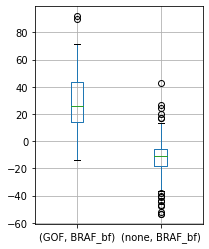

In [17]:
#
# viz GOF example
#
mybfgene = 'BRAF'
mymutgene= 'BRAF'
tempdf = bf.T[ mybfgene ].to_frame(name=mybfgene + '_bf').join(GOF.T[ mymutgene ].to_frame(name=mymutgene + '_mut'), sort=True)
tempdf.groupby(mymutgene + '_mut', sort=True).boxplot( mybfgene + '_bf', figsize=(3,4) )
del(tempdf)

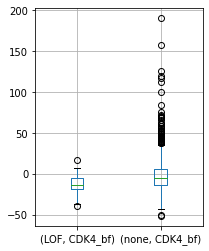

In [18]:
#
# viz LOF example
#
mybfgene = 'CDK4'
mymutgene= 'RB1'
tempdf = bf.T[ mybfgene ].to_frame(name=mybfgene + '_bf').join(LOF.T[ mymutgene ].to_frame(name=mymutgene + '_mut'), sort=True)
tempdf.groupby(mymutgene + '_mut', sort=True).boxplot( mybfgene + '_bf', figsize=(3,4) )
del(tempdf)

In [19]:
#
# expression
#
expr = pd.read_csv('./Data/CCLE_expression.csv', index_col=0)
expr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, ACH-001270 to ACH-000828
Columns: 17893 entries, TSPAN6 (7105) to ZBTB8B (728116)
dtypes: float64(17893)
memory usage: 164.0+ MB


In [20]:
expr.head(3)

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,GTF2H5 (404672),NUDT3 (11165),IFNL4 (101180976),MUSTN1 (389125),DOC2B (8447),OR5AL1 (79482),GRIN2B (2904),OR52E1 (79296),SNURF (8926),ZBTB8B (728116)
ACH-001270,3.976364,0.0,6.835798,1.959770,3.872829,0.070389,0.070389,5.437294,3.599318,3.468583,...,3.089159,2.746313,0.0,0.124328,0.226509,0.0,0.000000,0.0,5.810700,0.411426
ACH-001001,5.437627,0.0,7.325350,1.765535,3.739848,0.014355,0.687061,5.397803,4.416164,3.451541,...,2.241840,2.634593,0.0,0.275007,0.000000,0.0,0.014355,0.0,5.888500,0.084064
ACH-000956,2.650765,0.0,6.216843,3.427606,4.672991,0.014355,0.111031,5.803744,6.900867,5.287251,...,2.954196,3.584963,0.0,1.310340,0.000000,0.0,0.000000,0.0,6.654922,0.757023


<AxesSubplot:>

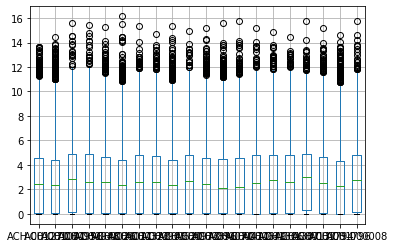

In [21]:
expr[:20].T.boxplot()

In [22]:
genes = [x.split(' ')[0] for x in expr.columns.values]
expr.columns = genes

In [23]:
expr_samples = [x for x in expr.index.values if x in bf.columns.values]
len(expr_samples)

718

In [24]:
expr = expr.loc[expr_samples]
expr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, ACH-001001 to ACH-000097
Columns: 17893 entries, TSPAN6 to ZBTB8B
dtypes: float64(17893)
memory usage: 98.0+ MB


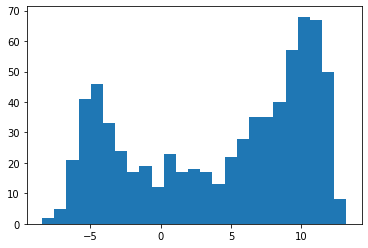

In [25]:
figure()
hist( expr.VIM - expr.CDH1, bins=25)
show()

In [26]:
expr.T.to_csv('./Data/CCLE_expression_718cellsInAvana20q4_17893genes.txt', sep='\t', index=True, float_format='%3.2f')